# EDA Analisis

## 📚 Libreries:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


## Input cleaned Csvs.

In [22]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')

###  🪙📚 coin_id_df:

In [23]:
coin_id_df.head(15)

,crip_id,symbol,name
0,akash-network,akt,akash network
1,binancecoin,bnb,bnb
2,binance-coin-wormhole,bnb,binance coin (wormhole)
3,binance-peg-cardano,ada,binance-peg cardano
4,binance-peg-dogecoin,doge,binance-peg dogecoin
5,binance-peg-xrp,xrp,binance-peg xrp
6,bitcoin,btc,bitcoin
7,bitrock,brock,bitrock
8,bone-2,bone,bone
9,bone-shibaswap,bone,bone shibaswap


### coins_global_trends_df:

In [24]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,pepe,29850,pepe,pepe,94,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,pepe,3.583937e-11,7
1,sei-network,28205,sei,sei,122,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,5.702732e-06,6
2,bitrock,30987,bitrock,brock,882,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,4.243262e-06,5
3,bone-shibaswap,16916,bone shibaswap,bone,103,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,bone-shibaswap,5.391797e-05,4
4,akash-network,12785,akash network,akt,111,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,5.432163e-05,3
5,komodo,611,komodo,kmd,434,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,komodo,1.124743e-05,2
6,worldcoin-wld,31069,worldcoin,wld,171,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,5.320359e-05,1


In [25]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [26]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [27]:
sorted_coins_global_trends_df.head()

,crip_id,name,market_cap_rank,price_btc,score
6,worldcoin-wld,worldcoin,171,0.000053,1
5,komodo,komodo,434,0.000011,2
4,akash-network,akash network,111,0.000054,3
3,bone-shibaswap,bone shibaswap,103,0.000054,4
2,bitrock,bitrock,882,0.000004,5


### ohlc_prices_df:

In [28]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-07-26 00:00:00,0.71364,0.71364,0.71364,0.71364,binance-peg-xrp
1,2023-07-26 04:00:00,0.71325,0.71325,0.70307,0.70516,binance-peg-xrp
2,2023-07-26 08:00:00,0.71174,0.71174,0.70142,0.70142,binance-peg-xrp
3,2023-07-26 12:00:00,0.69892,0.70179,0.69657,0.69657,binance-peg-xrp
4,2023-07-26 16:00:00,0.69921,0.70310,0.69921,0.70260,binance-peg-xrp
5,2023-07-26 20:00:00,0.70465,0.71626,0.70082,0.71626,binance-peg-xrp
6,2023-07-27 00:00:00,0.71118,0.72908,0.71118,0.71892,binance-peg-xrp
7,2023-07-27 04:00:00,0.71647,0.71647,0.70932,0.71331,binance-peg-xrp
8,2023-07-27 08:00:00,0.72086,0.72086,0.71112,0.71112,binance-peg-xrp
9,2023-07-27 12:00:00,0.71068,0.71750,0.71068,0.71478,binance-peg-xrp


In [29]:
ohlc_prices_df.shape

(7624, 6)

In [30]:
ohlc_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    7624 non-null   object 
 1   open_price   7624 non-null   float64
 2   high_price   7624 non-null   float64
 3   low_price    7624 non-null   float64
 4   close_price  7624 non-null   float64
 5   crip_id      7624 non-null   object 
dtypes: float64(4), object(2)
memory usage: 357.5+ KB


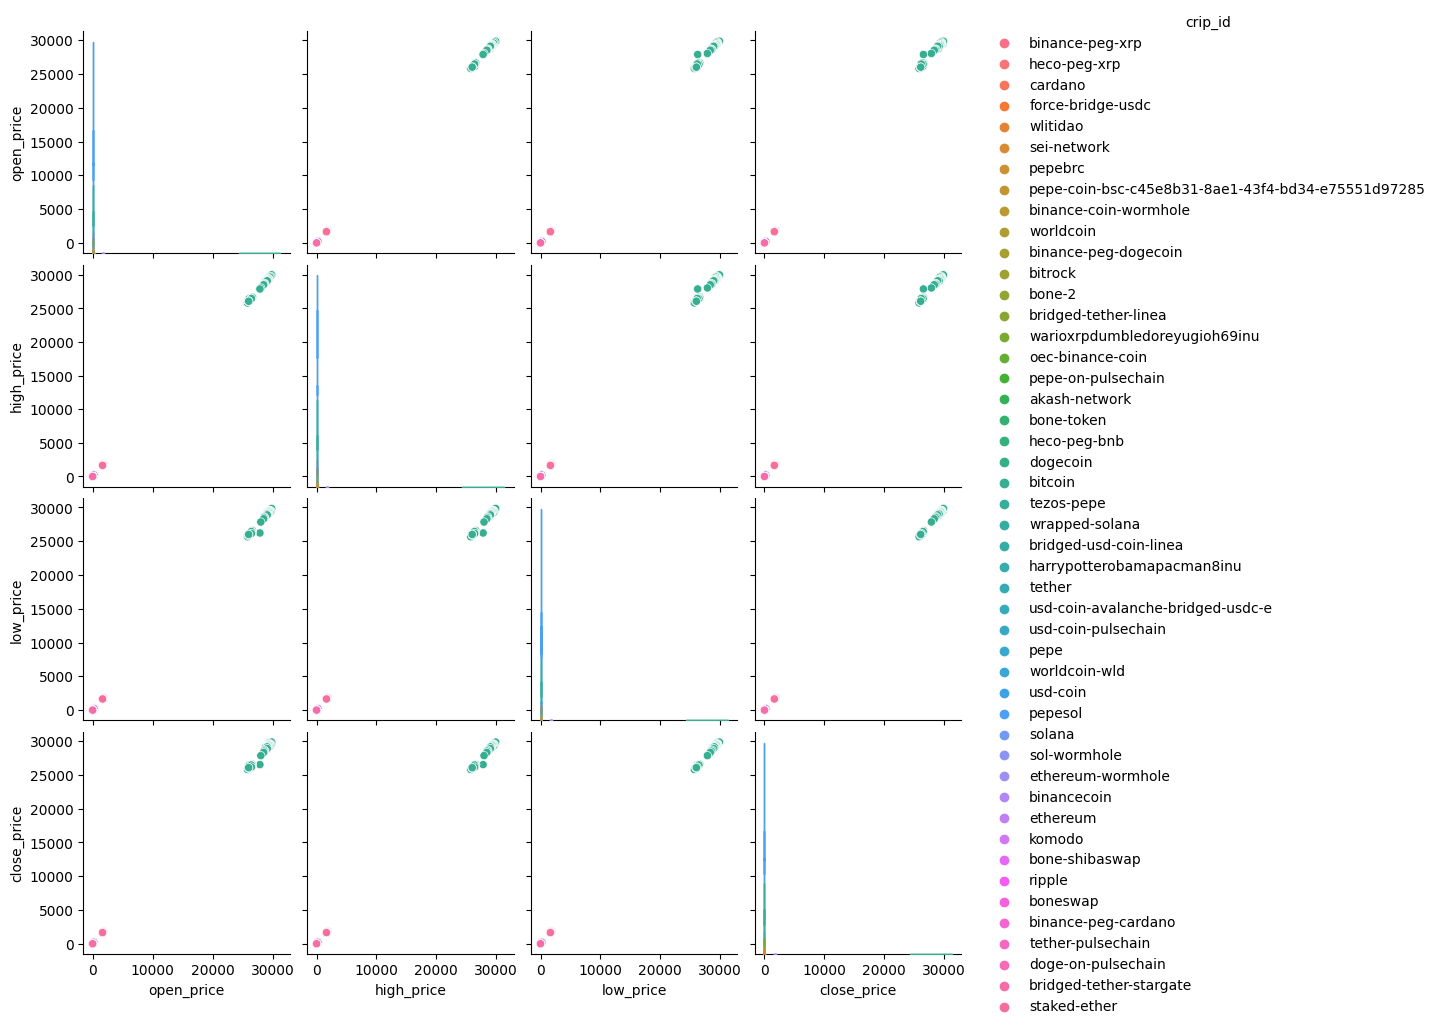

In [31]:
sns.pairplot(ohlc_prices_df, hue='crip_id')

In [32]:
# Convertir la columna 'timestamp' a tipo datetime
ohlc_prices_df['timestamp'] = pd.to_datetime(ohlc_prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
ohlc_prices_df = ohlc_prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos porcentuales respecto al valor anterior para las columnas de precio
price_columns = ['open_price', 'high_price', 'low_price', 'close_price']
for column in price_columns:
    ohlc_prices_df[f'{column}_percent_increment'] = ohlc_prices_df.groupby('crip_id')[column].pct_change()


In [33]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment
2648,2023-07-26 00:00:00,0.59320,0.59320,0.59320,0.59320,akash-network,NaN,NaN,NaN,NaN
2649,2023-07-26 04:00:00,0.59366,0.59576,0.59050,0.59050,akash-network,0.000775,0.004316,-0.004552,-0.004552
2650,2023-07-26 08:00:00,0.59273,0.60090,0.59273,0.60090,akash-network,-0.001567,0.008628,0.003776,0.017612
2651,2023-07-26 12:00:00,0.59973,0.59973,0.59708,0.59725,akash-network,0.011810,-0.001947,0.007339,-0.006074
2652,2023-07-26 16:00:00,0.59782,0.59782,0.59551,0.59566,akash-network,-0.003185,-0.003185,-0.002629,-0.002662


In [34]:
ohlc_prices_df = ohlc_prices_df.fillna(0)

### ohlc_prices_df_increments %:

In [35]:
ohlc_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/ohlc_prices_df_increments.csv', mode='w', index=False)

In [36]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment
2648,2023-07-26 00:00:00,0.59320,0.59320,0.59320,0.59320,akash-network,0.000000,0.000000,0.000000,0.000000
2649,2023-07-26 04:00:00,0.59366,0.59576,0.59050,0.59050,akash-network,0.000775,0.004316,-0.004552,-0.004552
2650,2023-07-26 08:00:00,0.59273,0.60090,0.59273,0.60090,akash-network,-0.001567,0.008628,0.003776,0.017612
2651,2023-07-26 12:00:00,0.59973,0.59973,0.59708,0.59725,akash-network,0.011810,-0.001947,0.007339,-0.006074
2652,2023-07-26 16:00:00,0.59782,0.59782,0.59551,0.59566,akash-network,-0.003185,-0.003185,-0.002629,-0.002662


_____________________________________________

#### jugando con transpuesta:

In [37]:
ohlc_prices_df_t = ohlc_prices_df.T

In [39]:
ohlc_prices_df_t.head(10)

,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,...,3792,3793,3794,3795,3796,3797,3798,3799,3800,3801
timestamp,2023-07-26 00:00:00,2023-07-26 04:00:00,2023-07-26 08:00:00,2023-07-26 12:00:00,2023-07-26 16:00:00,2023-07-26 20:00:00,2023-07-27 00:00:00,2023-07-27 04:00:00,2023-07-27 08:00:00,2023-07-27 12:00:00,...,2023-08-23 12:00:00,2023-08-23 16:00:00,2023-08-23 20:00:00,2023-08-24 00:00:00,2023-08-24 04:00:00,2023-08-24 08:00:00,2023-08-24 12:00:00,2023-08-24 16:00:00,2023-08-24 20:00:00,2023-08-25 00:00:00
open_price,0.5932,0.59366,0.59273,0.59973,0.59782,0.59603,0.58747,0.59038,0.58852,0.59335,...,20.76579,20.63429,20.84058,21.50084,21.63547,21.69953,21.72265,21.84448,21.13455,20.98506
high_price,0.5932,0.59576,0.6009,0.59973,0.59782,0.59617,0.58854,0.59038,0.58955,0.59376,...,20.87806,20.74268,21.37351,21.63261,21.7126,21.88881,21.72265,21.84448,21.13455,20.98506
low_price,0.5932,0.5905,0.59273,0.59708,0.59551,0.59091,0.58729,0.58773,0.58852,0.5927,...,20.76579,20.57018,20.84058,21.42073,21.63547,21.69953,21.65435,21.18829,20.92804,20.88354
close_price,0.5932,0.5905,0.6009,0.59725,0.59566,0.59091,0.58801,0.58773,0.58898,0.59376,...,20.77875,20.74268,21.37351,21.54076,21.66502,21.77853,21.6847,21.18829,20.92804,20.90699
crip_id,akash-network,akash-network,akash-network,akash-network,akash-network,akash-network,akash-network,akash-network,akash-network,akash-network,...,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana
open_price_percent_increment,0.0,0.000775,-0.001567,0.01181,-0.003185,-0.002994,-0.014362,0.004953,-0.003151,0.008207,...,0.008178,-0.006333,0.009997,0.031681,0.006262,0.002961,0.001065,0.005608,-0.032499,-0.007073
high_price_percent_increment,0.0,0.004316,0.008628,-0.001947,-0.003185,-0.00276,-0.012798,0.003126,-0.001406,0.007141,...,0.005105,-0.006484,0.030412,0.012122,0.003698,0.008116,-0.007591,0.005608,-0.032499,-0.007073
low_price_percent_increment,0.0,-0.004552,0.003776,0.007339,-0.002629,-0.007724,-0.006126,0.000749,0.001344,0.007103,...,0.011604,-0.00942,0.013145,0.027838,0.010025,0.002961,-0.002082,-0.021523,-0.012283,-0.002126
close_price_percent_increment,0.0,-0.004552,0.017612,-0.006074,-0.002662,-0.007974,-0.004908,-0.000476,0.002127,0.008116,...,0.000324,-0.001736,0.030412,0.007825,0.005769,0.005239,-0.004308,-0.022892,-0.012283,-0.001006


#### Jugando con pivot:

In [41]:
# Realizar la pivoteación
pivoted_ohlc_prices_df = ohlc_prices_df.pivot(index='timestamp', columns='crip_id', values=[
    'open_price', 'high_price', 'low_price', 'close_price',
    'open_price_percent_increment', 'high_price_percent_increment', 'low_price_percent_increment', 'close_price_percent_increment'
])

In [42]:
pivoted_ohlc_prices_df.head(10)

open_price                                            \
crip_id             akash-network binance-coin-wormhole binance-peg-cardano   
timestamp                                                                     
2023-07-26 00:00:00       0.59320             241.26296             0.30434   
2023-07-26 04:00:00       0.59366             242.68771             0.30425   
2023-07-26 08:00:00       0.59273             240.08397             0.30431   
2023-07-26 12:00:00       0.59973             240.50108             0.30216   
2023-07-26 16:00:00       0.59782             237.52219             0.30194   
2023-07-26 20:00:00       0.59603             238.27973             0.30468   
2023-07-27 00:00:00       0.58747             239.40863             0.30691   
2023-07-27 04:00:00       0.59038             239.13965             0.30644   
2023-07-27 08:00:00       0.58852             239.24652             0.31050   
2023-07-27 12:00:00       0.59335             242.77122             0.31051   

                                                                      \
crip_id             binance-peg-dogecoin binance-peg-xrp binancecoin   
timestamp                                                              
2023-07-26 00:00:00              0.08175         0.71364   237.89039   
2023-07-26 04:00:00              0.08186         0.71325   237.73035   
2023-07-26 08:00:00              0.08011         0.71174   238.28996   
2023-07-26 12:00:00              0.08074         0.69892   237.59065   
2023-07-26 16:00:00              0.07894         0.69921   236.80571   
2023-07-26 20:00:00              0.07880         0.70465   238.20809   
2023-07-27 00:00:00              0.07805         0.71118   238.56923   
2023-07-27 04:00:00              0.07812         0.71647   238.94902   
2023-07-27 08:00:00              0.07834         0.72086   240.13675   
2023-07-27 12:00:00              0.07833         0.71068   241.76804   

                                                                   ...  \
crip_id                  bitcoin  bitrock   bone-2 bone-shibaswap  ...   
timestamp                                                          ...   
2023-07-26 00:00:00  29215.01489  0.07479  0.02240        1.24813  ...   
2023-07-26 04:00:00  29222.97463  0.07297  0.02279        1.24636  ...   
2023-07-26 08:00:00  29247.80566  0.07293  0.02360        1.24806  ...   
2023-07-26 12:00:00  29205.50120  0.07917  0.02000        1.23970  ...   
2023-07-26 16:00:00  29167.30954  0.07886  0.02030        1.24376  ...   
2023-07-26 20:00:00  29313.49919  0.08068  0.02289        1.24566  ...   
2023-07-27 00:00:00  29354.73989  0.07481  0.02417        1.27578  ...   
2023-07-27 04:00:00  29363.67291  0.10519  0.02341        1.28152  ...   
2023-07-27 08:00:00  29428.22251  0.11462  0.02450        1.27719  ...   
2023-07-27 12:00:00  29416.06375  0.13240  0.02260        1.29034  ...   

                    close_price_percent_increment                       \
crip_id                         tether-pulsechain tezos-pepe  usd-coin   
timestamp                                                                
2023-07-26 00:00:00                      0.000000   0.000000  0.000000   
2023-07-26 04:00:00                      0.016499   0.052632 -0.000580   
2023-07-26 08:00:00                     -0.007244   0.000000  0.001211   
2023-07-26 12:00:00                     -0.003197  -0.050000 -0.000869   
2023-07-26 16:00:00                      0.001703   0.052632  0.000360   
2023-07-26 20:00:00                     -0.001044   0.000000 -0.000990   
2023-07-27 00:00:00                      0.005643   0.000000  0.001001   
2023-07-27 04:00:00                      0.007472  -0.050000  0.000580   
2023-07-27 08:00:00                     -0.014725   0.052632 -0.000969   
2023-07-27 12:00:00                      0.005573   0.000000 -0.000020   

                                                                           \
crip_id             usd-coin-avalanche-bridged-usdc-e u

___________________________________

### prices_df:

In [43]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,binance-peg-xrp,2023-03-15 00:00:00,0.37710,0.0,1133285.80
1,binance-peg-xrp,2023-03-16 00:00:00,0.35992,0.0,637895.10
2,binance-peg-xrp,2023-03-17 00:00:00,0.36830,0.0,901432.80
3,binance-peg-xrp,2023-03-18 00:00:00,0.38203,0.0,712634.70
4,binance-peg-xrp,2023-03-19 00:00:00,0.37665,0.0,649264.80
5,binance-peg-xrp,2023-03-20 00:00:00,0.38996,0.0,1461338.80
6,binance-peg-xrp,2023-03-21 00:00:00,0.37730,0.0,1066608.50
7,binance-peg-xrp,2023-03-22 00:00:00,0.46931,0.0,4893209.00
8,binance-peg-xrp,2023-03-23 00:00:00,0.42361,0.0,3060548.50
9,binance-peg-xrp,2023-03-24 00:00:00,0.44603,0.0,1981168.20


In [44]:
prices_df.shape

(6014, 5)

In [45]:
# Convertir la columna 'timestamp' a tipo datetime
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
prices_df = prices_df.sort_values(by=['crip_id', 'timestamp'])

prices_df['price_percent_increment'] = prices_df.groupby('crip_id')['price'].pct_change() 
prices_df['market_cap_percent_increment'] = prices_df.groupby('crip_id')['market_cap'].pct_change() 
prices_df['total_volume_percent_increment'] = prices_df.groupby('crip_id')['total_volume'].pct_change()

In [46]:
prices_df = prices_df.fillna(0)

In [47]:
prices_df.head()

,crip_id,timestamp,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
1997,akash-network,2023-03-15,0.35384,71184600.0,1493418.8,0.000000,0.000000,0.000000
1998,akash-network,2023-03-16,0.33292,66963104.0,1525969.9,-0.059123,-0.059304,0.021796
1999,akash-network,2023-03-17,0.33480,67376620.0,1290421.4,0.005647,0.006175,-0.154360
2000,akash-network,2023-03-18,0.34765,69827780.0,1350676.4,0.038381,0.036380,0.046694
2001,akash-network,2023-03-19,0.34163,68762080.0,1398585.6,-0.017316,-0.015262,0.035471


#### Guardo prices_df_increments

In [48]:
prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/prices_df_increments.csv', mode='w',index=False)

In [49]:
prices_df.head(167)

,crip_id,timestamp,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
1997,akash-network,2023-03-15 00:00:00,0.35384,71184600.0,1.493419e+06,0.000000,0.000000,0.000000
1998,akash-network,2023-03-16 00:00:00,0.33292,66963104.0,1.525970e+06,-0.059123,-0.059304,0.021796
1999,akash-network,2023-03-17 00:00:00,0.33480,67376620.0,1.290421e+06,0.005647,0.006175,-0.154360
2000,akash-network,2023-03-18 00:00:00,0.34765,69827780.0,1.350676e+06,0.038381,0.036380,0.046694
2001,akash-network,2023-03-19 00:00:00,0.34163,68762080.0,1.398586e+06,-0.017316,-0.015262,0.035471
...,...,...,...,...,...,...,...,...
2159,akash-network,2023-08-24 00:00:00,1.53132,331225470.0,5.504659e+06,0.037065,0.031928,-0.005574
2160,akash-network,2023-08-24 17:18:08,1.46109,318134050.0,5.301414e+06,-0.045862,-0.039524,-0.036922
1035,binance-coin-wormhole,2023-03-15 00:00:00,312.71190,0.0,1.004407e+03,0.000000,0.000000,0.000000
1036,binance-coin-wormhole,2023-03-16 00:00:00,307.90518,0.0,1.531907e+03,-0.015371,0.000000,0.525185


In [90]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 1997 to 3095
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   crip_id                         6014 non-null   object        
 1   timestamp                       6014 non-null   datetime64[ns]
 2   price                           6014 non-null   float64       
 3   market_cap                      6014 non-null   float64       
 4   total_volume                    6014 non-null   float64       
 5   price_percent_increment         6014 non-null   float64       
 6   market_cap_percent_increment    6014 non-null   float64       
 7   total_volume_percent_increment  6014 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 422.9+ KB


In [50]:
# sns.pairplot(prices_df, hue='crip_id')

### Merged Ohlc_prices_df y Prices_df:

##### Merge

In [51]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [52]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
0,2023-07-26,0.59320,0.59320,0.59320,0.59320,akash-network,0.000000,0.000000,0.000000,0.000000,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.014362,-0.012798,-0.006126,-0.004908,0.59038,127458380.0,1345674.1,-0.005525,-0.006462,0.078402
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.031526,0.013844,0.026414,0.008719,0.61132,132123070.0,1601590.9,0.035469,0.036598,0.190177
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.003975,-0.005080,-0.006189,-0.006189,0.61653,133252100.0,1711907.4,0.008523,0.008545,0.068879
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.009511,-0.004358,0.001513,0.010144,0.62007,134028590.0,1497002.0,0.005742,0.005827,-0.125536
5,2023-07-31,0.60921,0.60921,0.60508,0.60563,akash-network,-0.001868,-0.001868,-0.006029,-0.006545,0.60788,131424910.0,1282722.4,-0.019659,-0.019426,-0.143139
6,2023-08-01,0.61347,0.61433,0.60700,0.60700,akash-network,0.002140,0.003397,-0.007440,-0.007602,0.60516,130939840.0,1549232.4,-0.004475,-0.003691,0.207769
7,2023-08-02,0.57365,0.57727,0.57365,0.57678,akash-network,-0.006770,-0.003986,0.011996,0.009257,0.57967,125053600.0,1809254.0,-0.042121,-0.044954,0.167839
8,2023-08-03,0.59689,0.59854,0.59670,0.59854,akash-network,0.013516,0.016042,0.020488,0.016042,0.59464,128767460.0,1424714.9,0.025825,0.029698,-0.212540
9,2023-08-04,0.58328,0.58328,0.58043,0.58043,akash-network,0.003216,0.000480,-0.001686,-0.002715,0.57939,125370570.0,1296045.0,-0.025646,-0.026380,-0.090313


In [53]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1268, 16)

In [54]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

##### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [55]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

##### merged_df_ohlc_prices_df_and_prices_df % :

In [56]:
# # Calculate percentage change for the specified columns
# percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
# for col in percentage_columns:
#     col_name = f"{col}_change"
#     merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# # Display the resulting DataFrame
# print(merged_df_ohlc_prices_df_and_prices_df.head(10))


In [57]:
# # Display the resulting DataFrame
# merged_df_ohlc_prices_df_and_prices_df.shape

In [58]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df, hue='crip_id')

### ranking_coingecko_df:

In [59]:
ranking_coingecko_df.head(15)

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,binance-peg-xrp,binance-smart-chain,0,1648,3266.0,9.289,0.000,12.520,32.667,0.022,2023-08-24 22:05:47.169000+00:00,0.00,0.00,0.0,NaN
1,heco-peg-xrp,huobi-token,0,116,6565.0,0.201,0.000,0.000,1.000,0.022,2023-08-24 22:04:20.966000+00:00,0.00,0.00,0.0,NaN
2,cardano,NaN,0,724939,7.0,62.536,70.270,58.753,72.124,0.023,2023-08-24 22:06:05.871000+00:00,83.53,16.47,8.0,NaN
3,force-bridge-usdc,godwoken,0,54,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-24 22:05:19.113000+00:00,0.00,0.00,0.0,NaN
4,wlitidao,polygon-pos,0,218,4445.0,4.096,12.000,4.073,1.000,0.000,2023-08-24 22:06:13.088000+00:00,0.00,0.00,0.0,NaN
5,sei-network,NaN,0,9114,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-24 22:06:13.361000+00:00,66.25,33.75,122.0,NaN
6,pepebrc,ordinals,0,1000,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-24 22:05:15.901000+00:00,100.00,0.00,2269.0,NaN
7,pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d9...,binance-smart-chain,0,20126,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-19 21:00:24.033000+00:00,50.00,50.00,0.0,NaN
8,binance-coin-wormhole,ethereum,0,914,3817.0,5.977,0.000,9.446,19.493,0.003,2023-08-24 22:05:42.980000+00:00,0.00,0.00,0.0,NaN
9,worldcoin,NaN,0,3568,2684.0,11.995,26.498,7.231,1.000,0.000,2023-08-24 22:06:33.339000+00:00,0.00,0.00,3643.0,NaN


In [60]:
ranking_coingecko_df.shape

(50, 15)

In [61]:
ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          50 non-null     object 
 1   asset_platform_id                37 non-null     object 
 2   block_time_in_minutes            50 non-null     int64  
 3   watchlist_portfolio_users        50 non-null     int64  
 4   coingecko_rank                   50 non-null     float64
 5   coingecko_score                  50 non-null     float64
 6   developer_score                  50 non-null     float64
 7   community_score                  50 non-null     float64
 8   liquidity_score                  50 non-null     float64
 9   public_interest_score            50 non-null     float64
 10  last_updated                     50 non-null     object 
 11  sentiment_votes_up_percentage    50 non-null     float64
 12  sentiment_votes_down_per

In [62]:
ranking_coingecko_df.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,binance-peg-xrp,binance-smart-chain,0,1648,3266.0,9.289,0.00,12.520,32.667,0.022,2023-08-24 22:05:47.169000+00:00,0.00,0.00,0.0,NaN
1,heco-peg-xrp,huobi-token,0,116,6565.0,0.201,0.00,0.000,1.000,0.022,2023-08-24 22:04:20.966000+00:00,0.00,0.00,0.0,NaN
2,cardano,NaN,0,724939,7.0,62.536,70.27,58.753,72.124,0.023,2023-08-24 22:06:05.871000+00:00,83.53,16.47,8.0,NaN
3,force-bridge-usdc,godwoken,0,54,0.0,0.000,0.00,0.000,0.000,0.000,2023-08-24 22:05:19.113000+00:00,0.00,0.00,0.0,NaN
4,wlitidao,polygon-pos,0,218,4445.0,4.096,12.00,4.073,1.000,0.000,2023-08-24 22:06:13.088000+00:00,0.00,0.00,0.0,NaN


In [63]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

### Merged with ranking_congecko_df: Solo se puede por crip_id

In [64]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [65]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,...,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,2023-07-26,0.59320,0.59320,0.59320,0.59320,akash-network,0.000000,0.000000,0.000000,0.000000,...,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.014362,-0.012798,-0.006126,-0.004908,...,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.031526,0.013844,0.026414,0.008719,...,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.003975,-0.005080,-0.006189,-0.006189,...,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.009511,-0.004358,0.001513,0.010144,...,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN


In [66]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1328, 30)

In [67]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [68]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,2023-07-26,0.59320,0.59320,0.59320,0.59320,akash-network,0.000000,0.000000,0.000000,0.000000,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.014362,-0.012798,-0.006126,-0.004908,0.59038,127458380.0,1345674.1,-0.005525,-0.006462,0.078402,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.031526,0.013844,0.026414,0.008719,0.61132,132123070.0,1601590.9,0.035469,0.036598,0.190177,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.003975,-0.005080,-0.006189,-0.006189,0.61653,133252100.0,1711907.4,0.008523,0.008545,0.068879,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.009511,-0.004358,0.001513,0.010144,0.62007,134028590.0,1497002.0,0.005742,0.005827,-0.125536,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN


In [69]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [70]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [71]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
ethereum                                              60
bitcoin                                               60
akash-network                                         30
solana                                                30
pepe                                                  30
pepe-on-pulsechain                                    30
pepebrc                                               30
pepesol                                               30
ripple                                                30
sol-wormhole                                          30
staked-ether                                          30
binance-coin-wormhole                                 30
tether                                                30
tether-pulsechain                                     30
usd-coin                                              30
usd-coin-avalanche-bridged-usdc-e                     30
usd-coin-pulsechain                                   30
worldcoin              

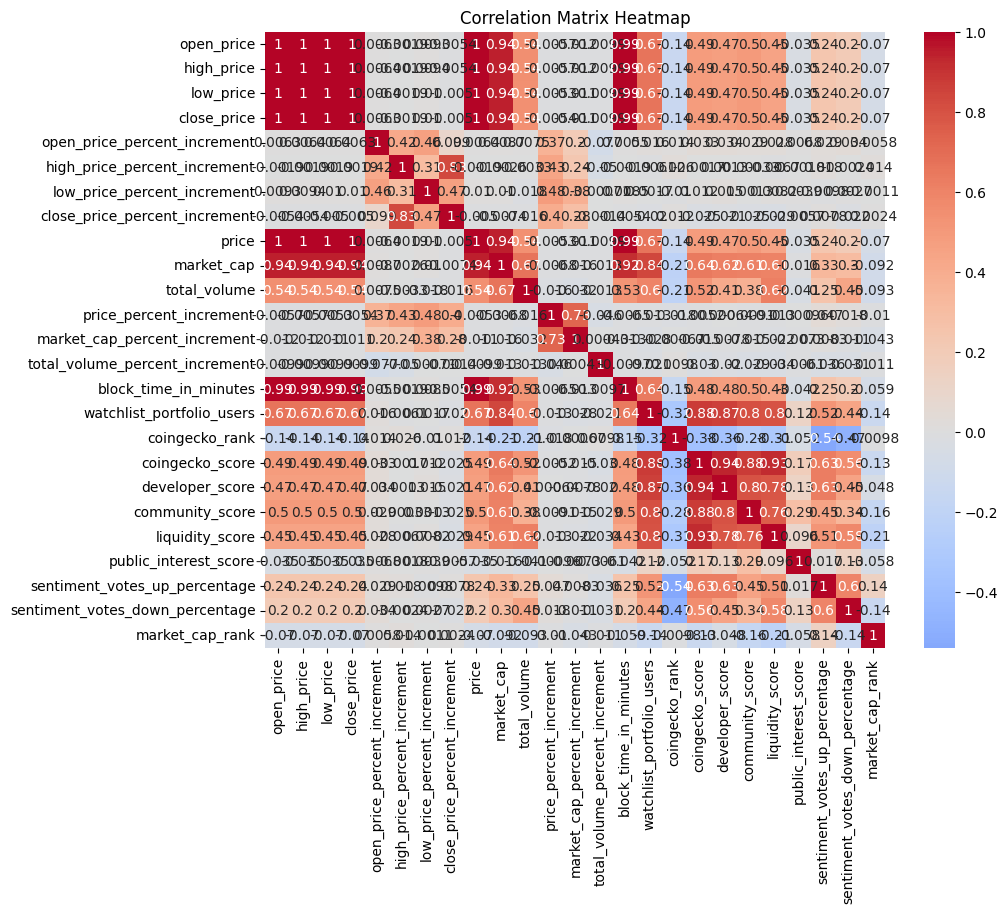

In [72]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



___________________________________________________________________

### Experimentando otro poco

In [73]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        1328 non-null   datetime64[ns]
 1   open_price                       1328 non-null   float64       
 2   high_price                       1328 non-null   float64       
 3   low_price                        1328 non-null   float64       
 4   close_price                      1328 non-null   float64       
 5   crip_id                          1328 non-null   object        
 6   open_price_percent_increment     1328 non-null   float64       
 7   high_price_percent_increment     1328 non-null   float64       
 8   low_price_percent_increment      1328 non-null   float64       
 9   close_price_percent_increment    1328 non-null   float64       
 10  price                            1328 non-null   float64    

________________________________________________________________________________

### tickers_resume_df:

In [74]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.376006e-03,5.392102e+05,green,0.602851,2023-08-24 22:34:36,2023-08-24 22:34:36,2023-08-24 22:37:49,False,False,https://pancakeswap.finance/swap?inputcurrency...,not founded token_info_url #404,binance-peg-xrp,wbnb,pancakeswap v3 (bsc),pancakeswap-v3-bsc,0.00002,0.000312,0.516868,10.804435,170.530000,282122.000000
1,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,wbnb,2.388535e-03,5.192399e+04,green,0.603466,2023-08-24 22:33:31,2023-08-24 22:33:31,2023-08-24 22:39:31,False,False,https://pancakeswap.finance/swap?inputcurrency...,not founded token_info_url #404,binance-peg-xrp,wbnb,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,1.039320,16.404841,27139.000000
2,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.378978e-03,3.228525e+04,green,0.603503,2023-08-24 22:33:24,2023-08-24 22:33:24,2023-08-24 22:39:20,False,False,https://exchange.biswap.org/#/swap?inputcurren...,not founded token_info_url #404,binance-peg-xrp,wbnb,biswap,biswap,0.00002,0.000313,0.517526,0.644564,10.173934,16831.050000
3,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,5.110920e-01,4.251834e+03,green,0.606890,2023-08-24 21:39:18,2023-08-24 21:39:18,2023-08-24 22:39:16,False,False,https://pancakeswap.finance/swap?inputcurrency...,not founded token_info_url #404,binance-peg-xrp,binance-peg-xrp,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,0.043221,0.682215,1128.610000
4,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.374630e-03,1.051540e+03,green,0.615835,2023-08-24 22:18:29,2023-08-24 22:18:29,2023-08-24 22:38:17,False,False,https://apeswap.finance/swap?inputcurrency=0x1...,not founded token_info_url #404,binance-peg-xrp,wbnb,apeswap,apeswap_bsc,0.00002,0.000312,0.516572,0.021005,0.331545,548.490000
5,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x55d398326f99059ff775485246999027b3197955,5.158911e-01,1.874107e+02,green,0.641487,2023-08-24 21:56:20,2023-08-24 21:56:20,2023-08-24 22:39:31,False,False,https://exchange.babyswap.finance/#/swap?input...,not founded token_info_url #404,binance-peg-xrp,tether,babyswap,babyswap,0.00002,0.000312,0.516014,0.003731,0.058891,97.430000
6,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x55d398326f99059ff775485246999027b3197955,5.190071e-01,1.236241e+04,yellow,0.608235,2023-08-24 22:18:30,2023-08-24 22:18:30,2023-08-24 22:38:18,False,False,https://bsc.mdex.com/#/swap?outputcurrency=0x5...,not founded token_info_url #404,binance-peg-xrp,tether,mdex bsc,mdex_bsc,0.00002,0.000314,0.518822,0.242636,3.829700,6335.670000
7,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x7130d2a12b9bcbfae4f2634d864a1ee1ce3ead9c,1.976107e-05,4.628358e+01,yellow,0.689839,2023-08-24 15:12:20,2023-08-24 15:12:20,2023-08-24 22:39:18,False,False,https://pancakeswap.finance/swap?inputcurrency...,not founded token_info_url #404,binance-peg-xrp,binance-bitcoin,pancakeswap (v2),pancakeswap_new,0.00002,0.000311,0.514975,0.000914,0.014424,23.860000
8,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x2170ed0880ac9a755fd29b2688956bd959f933f8,3.146353e-04,3.415624e+03,green,0.606855,2023-08-22 04:33:08,2023-08-22 04:33:08,2023-08-22 04:41:42,False,True,https://pancakeswap.finance/swap?inputcurrency...,not founded token_info_url #404,binance-peg-xrp,weth,pancakeswap v3 (bsc),pancakeswap-v3-bsc,0.00002,0.000315,0.523572,0.068028,1.064998,1770.080000
9,0x0cf8e180350253271f4b917ccfb0accc4862f262,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,1.212321e-15,1.160345e+15,red,0.942196,2023-08-22 22:16:33,2023-08-22 22:16:33,2023-08-23 11:50:39,False,True,htt

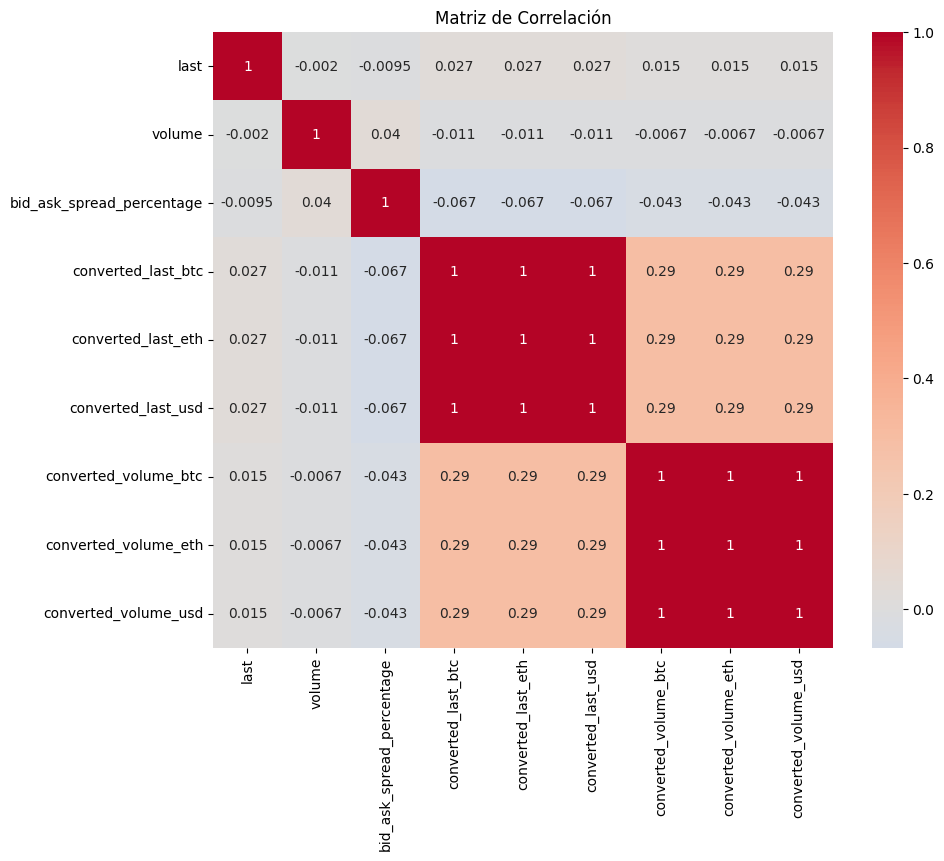

In [75]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


________________________________

### algunos experimentos para el merge, timestamp mas proximo

In [76]:
# Realizar el merge
merged_result = pd.merge(merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df, tickers_resume_df, on=["crip_id"])

In [77]:
# Imprimir el resultado
merged_result.head(5)

,timestamp_x,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp_y,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,2023-07-26,0.5932,0.5932,0.5932,0.5932,akash-network,0.0,0.0,0.0,0.0,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN,akt,usdt,1.41050,624735.919200,green,0.155642,2023-08-24 22:38:02,2023-08-24 22:38:02,2023-08-24 22:38:02,False,False,https://www.kucoin.com/trade/akt-usdt,not founded token_info_url #404,tether,kucoin,kucoin,0.000054,0.000852,1.41,33.721758,532.256000,880538.0
1,2023-07-26,0.5932,0.5932,0.5932,0.5932,akash-network,0.0,0.0,0.0,0.0,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN,akt,usd,1.41390,492827.268834,green,0.485642,2023-08-24 22:41:23,2023-08-24 22:41:23,2023-08-24 22:41:23,False,False,https://pro.kraken.com/app/trade/akt-usd,not founded token_info_url #404,usd,kraken,kraken,0.000054,0.000855,1.41,26.684232,421.208000,696808.0
2,2023-07-26,0.5932,0.5932,0.5932,0.5932,akash-network,0.0,0.0,0.0,0.0,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN,akt,usdt,1.42234,316672.000000,green,0.498091,2023-08-24 22:41:08,2023-08-24 22:41:08,2023-08-24 22:41:08,False,False,https://ascendex.com/en/cashtrade-spottrading/...,not founded token_info_url #404,tether,ascendex (bitmax),bitmax,0.000054,0.000859,1.42,17.236863,272.082000,450108.0
3,2023-07-26,0.5932,0.5932,0.5932,0.5932,akash-network,0.0,0.0,0.0,0.0,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN,akt,usdt,1.41692,185180.587505,green,0.504901,2023-08-24 22:38:54,2023-08-24 22:38:54,2023-08-24 22:38:54,False,False,https://gate.io/trade/akt_usdt,not founded token_info_url #404,tether,gate.io,gate,0.000054,0.000856,1.42,10.194496,160.907000,266197.0
4,2023-07-26,0.5932,0.5932,0.5932,0.5932,akash-network,0.0,0.0,0.0,0.0,0.59366,128287320.0,1247840.9,0.019772,0.019854,-0.174672,NaN,0,51111,121.0,43.599,70.553,34.801,25.05,0.002,2023-08-24 22:08:31.055000+00:00,85.53,14.47,111.0,NaN,akt,usd,1.40844,47527.000000,green,0.010710,2023-08-24 22:19:57,2023-08-24 22:19:57,2023-08-24 22:39:43,False,False,https://crypto.com/exchange/trade/spot/akt_usd,not founded token_info_url #404,usd,crypto.com exchange,crypto_com,0.000054,0.000851,1.41,2.563502,40.462848,66939.0


In [78]:
merged_result.shape

(60542, 52)

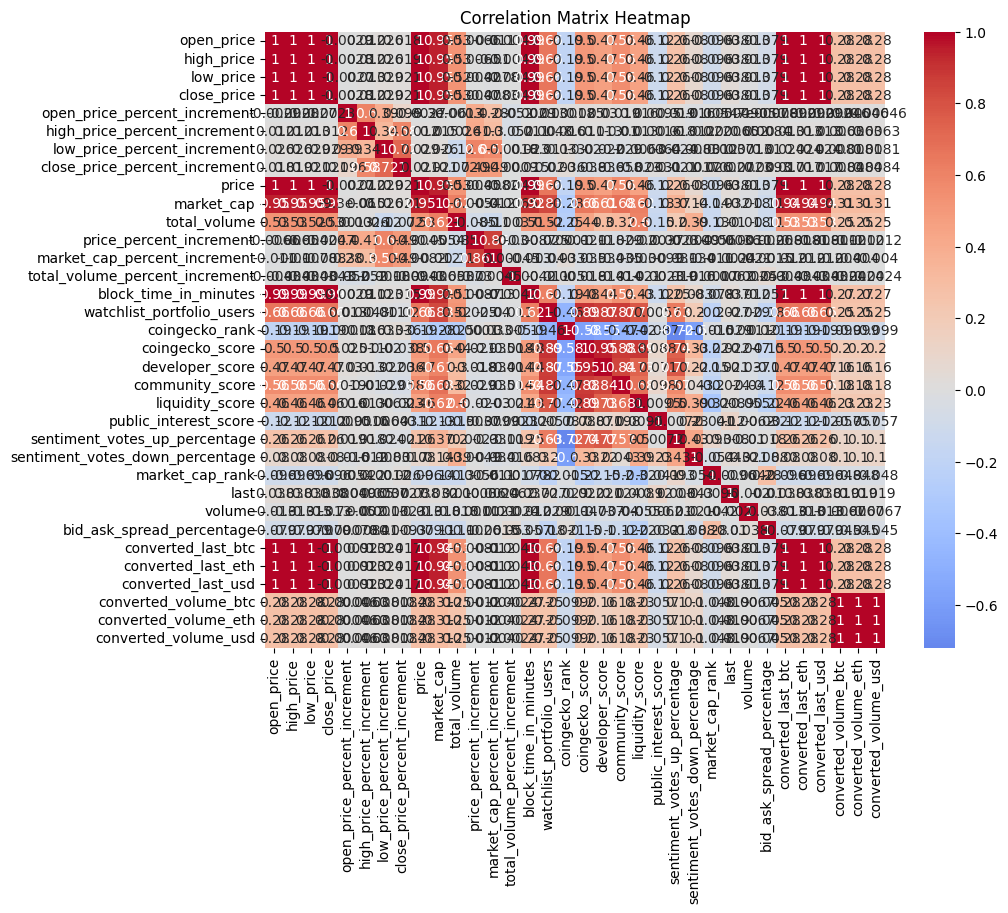

In [79]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_result.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [80]:
merged_result.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_result.csv', mode='w', index=False)

________________________________________

### top_criptos_df:

In [81]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.426280,4.193089e+07,1.849855e+06
1,eth,18.178685,6.612925e+08,2.917408e+07
2,bnb,3.054377,5.037306e+09,2.222296e+08
3,xrp,2.509268,2.115016e+12,9.330764e+10


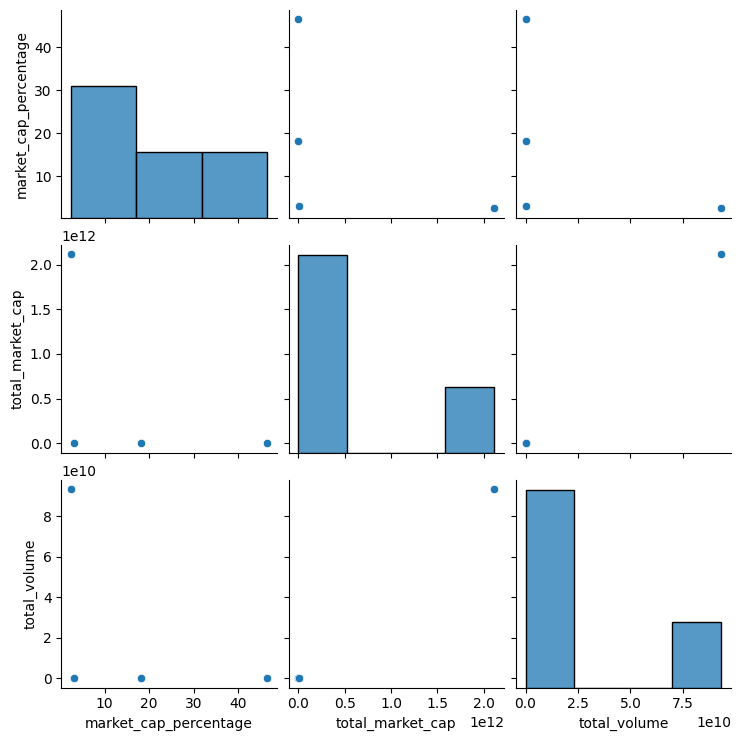

In [82]:
sns.pairplot(top_criptos_df)

### Timestamp

In [107]:
df_list = [ohlc_prices_df, prices_df, tickers_resume_df]  # Coloca aquí tus DataFrames

# Concatenar los DataFrames en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Obtener los valores únicos de la columna 'timestamp'
unique_timestamps = combined_df['timestamp'].unique()

# Crear un nuevo DataFrame con los valores únicos de 'timestamp'
unique_timestamps_df = pd.DataFrame({'timestamp': unique_timestamps})


# Imprimir el nuevo DataFrame
print(unique_timestamps_df)


                timestamp
0     2023-07-26 00:00:00
1     2023-07-26 04:00:00
2     2023-07-26 08:00:00
3     2023-07-26 12:00:00
4     2023-07-26 16:00:00
...                   ...
1029  2023-08-24 22:45:11
1030  2023-08-24 22:44:57
1031  2023-08-24 22:45:02
1032  2023-08-24 22:45:45
1033  2023-08-24 22:44:52

[1034 rows x 1 columns]


In [108]:
unique_timestamps_df.head()

,timestamp
0,2023-07-26 00:00:00
1,2023-07-26 04:00:00
2,2023-07-26 08:00:00
3,2023-07-26 12:00:00
4,2023-07-26 16:00:00


In [116]:
# Convertir la columna 'timestamp' a tipo datetime64[ns]
unique_timestamps_df['timestamp'] = pd.to_datetime(unique_timestamps_df['timestamp'])


In [121]:
unique_timestamps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 1033
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1033 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.1 KB


In [120]:
unique_timestamps_df = unique_timestamps_df.drop_duplicates()
unique_timestamps_df = unique_timestamps_df.dropna()

In [122]:
unique_timestamps_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/unique_timestamps_df.csv', mode='w', index=False)